## Hierarchical clustering

For applications involving numeric data, the most importance choice is the dissimilarity  metric.  Hierarchical  clustering  starts  by  setting  each  record  as  its  own  cluster
and iterates to combine the least dissimilar clusters.


## Distance between clusters
Defined by a linkage method
- specified via method parameter,e.g. linkage(samples, method="complete")
- in "complete" linkage, distance between clusters is max. distance between their samples
- in "single" linkage, distance between clusters is the distance between the closest points of the clusters
- see more types of linkage here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

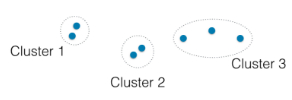

Consider the three clusters in the diagram. Which of the following statements are true?

A. In single linkage, cluster 3 is the closest to cluster 2.

B. In complete linkage, cluster 1 is the closest to cluster 2.

1) Neither A nor B.

2) A only.

3) B only.

4) Both A and B.

## Complexity of Hierarchical Clustering

Let *m* be the number of samples to cluster, d be the number of features and **k** be the number of clusters

Let’s now see a simple example: a hierarchical clustering of distances in kilometers between some Italian cities. The method used is single-linkage.


First we need to build a distance matrix:
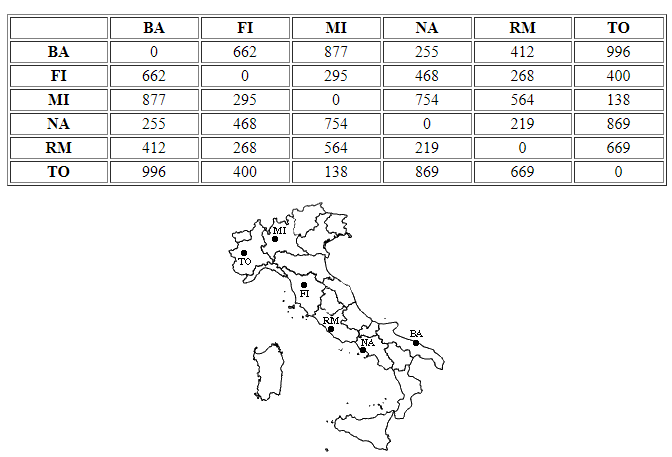

Time complexity O(dm^2)


The nearest pair of cities is MI and TO, **at distance 138**. These are merged into a single cluster called "MI/TO". The level of the new cluster is L(MI/TO) = 138

Time complexity is O(m^2) to find the next two clusters to merge

Then we compute the distance from this new compound object to all other objects. In single link clustering the rule is that the distance from the compound object to another object is equal to the shortest distance from any member of the cluster to the outside object. So the distance from "MI/TO" to RM is chosen to be 564, which is the distance from MI to RM, and so on.

After merging MI with TO we obtain the following matrix:

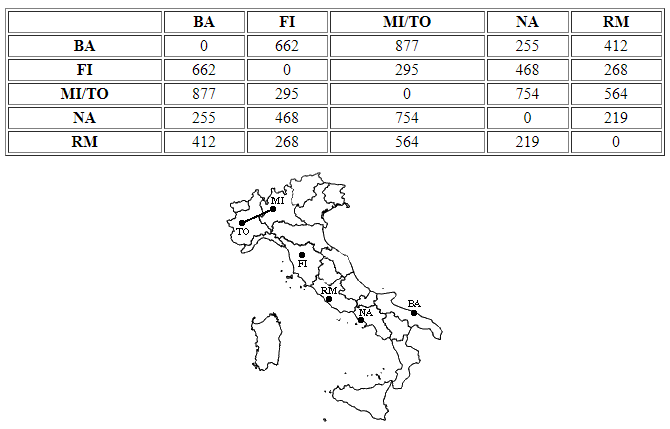

Time complexity is O(m) to merge two clusters if single linkage is used.

We need to merge for *m-k* times:
O((m^2d)+(m-k)(m^2+m)) ---> O(m^3)


Hierarchical clustering’s flexibility comes with a cost, and hierarchical clustering **does
not scale well to large data sets** with millions of records. For even modest-sized data
with  just  tens  of  thousands  of  records,  hierarchical  clustering  can  require  intensive
computing resources. Indeed, most of the applications of hierarchical clustering are
focused on relatively small data sets.

### Dendrogram

Hierarchical clustering lends itself to a natural graphical display as a tree, referred to
as a dendrogram. The name comes from the Greek words dendro (tree) and gramma
(drawing). 

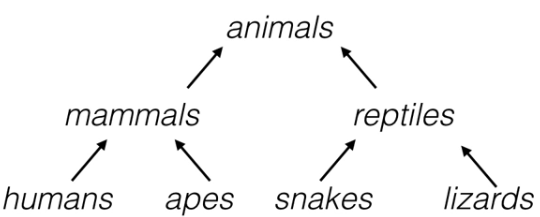

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
samples = [[ 14.88  ,  14.57  ,   0.8811,   5.554 ,   3.333 ,   1.018 ,   4.956 ],
       [ 14.69  ,  14.49  ,   0.8799,   5.563 ,   3.259 ,   3.586 ,   5.219 ],
       [ 14.03  ,  14.16  ,   0.8796,   5.438 ,   3.201 ,   1.717 ,   5.001 ],
       [ 13.99  ,  13.83  ,   0.9183,   5.119 ,   3.383 ,   5.234 ,   4.781 ],
       [ 14.11  ,  14.26  ,   0.8722,   5.52  ,   3.168 ,   2.688 ,   5.219 ],
       [ 13.02  ,  13.76  ,   0.8641,   5.395 ,   3.026 ,   3.373 ,   4.825 ],
       [ 15.49  ,  14.94  ,   0.8724,   5.757 ,   3.371 ,   3.412 ,   5.228 ],
       [ 16.2   ,  15.27  ,   0.8734,   5.826 ,   3.464 ,   2.823 ,   5.527 ],
       [ 13.5   ,  13.85  ,   0.8852,   5.351 ,   3.158 ,   2.249 ,   5.176 ],
       [ 15.36  ,  14.76  ,   0.8861,   5.701 ,   3.393 ,   1.367 ,   5.132 ],
       [ 15.78  ,  14.91  ,   0.8923,   5.674 ,   3.434 ,   5.593 ,   5.136 ],
       [ 14.46  ,  14.35  ,   0.8818,   5.388 ,   3.377 ,   2.802 ,   5.044 ],
       [ 11.23  ,  12.63  ,   0.884 ,   4.902 ,   2.879 ,   2.269 ,   4.703 ],
       [ 14.34  ,  14.37  ,   0.8726,   5.63  ,   3.19  ,   1.313 ,   5.15  ],
       [ 16.84  ,  15.67  ,   0.8623,   5.998 ,   3.484 ,   4.675 ,   5.877 ],
       [ 17.32  ,  15.91  ,   0.8599,   6.064 ,   3.403 ,   3.824 ,   5.922 ],
       [ 18.72  ,  16.19  ,   0.8977,   6.006 ,   3.857 ,   5.324 ,   5.879 ],
       [ 18.88  ,  16.26  ,   0.8969,   6.084 ,   3.764 ,   1.649 ,   6.109 ],
       [ 18.76  ,  16.2   ,   0.8984,   6.172 ,   3.796 ,   3.12  ,   6.053 ],
       [ 19.31  ,  16.59  ,   0.8815,   6.341 ,   3.81  ,   3.477 ,   6.238 ],
       [ 17.99  ,  15.86  ,   0.8992,   5.89  ,   3.694 ,   2.068 ,   5.837 ],
       [ 18.85  ,  16.17  ,   0.9056,   6.152 ,   3.806 ,   2.843 ,   6.2   ],
       [ 19.38  ,  16.72  ,   0.8716,   6.303 ,   3.791 ,   3.678 ,   5.965 ],
       [ 18.96  ,  16.2   ,   0.9077,   6.051 ,   3.897 ,   4.334 ,   5.75  ],
       [ 18.14  ,  16.12  ,   0.8772,   6.059 ,   3.563 ,   3.619 ,   6.011 ],
       [ 18.65  ,  16.41  ,   0.8698,   6.285 ,   3.594 ,   4.391 ,   6.102 ],
       [ 18.94  ,  16.32  ,   0.8942,   6.144 ,   3.825 ,   2.908 ,   5.949 ],
       [ 17.36  ,  15.76  ,   0.8785,   6.145 ,   3.574 ,   3.526 ,   5.971 ],
       [ 13.32  ,  13.94  ,   0.8613,   5.541 ,   3.073 ,   7.035 ,   5.44  ],
       [ 11.43  ,  13.13  ,   0.8335,   5.176 ,   2.719 ,   2.221 ,   5.132 ],
       [ 12.01  ,  13.52  ,   0.8249,   5.405 ,   2.776 ,   6.992 ,   5.27  ],
       [ 11.34  ,  12.87  ,   0.8596,   5.053 ,   2.849 ,   3.347 ,   5.003 ],
       [ 12.02  ,  13.33  ,   0.8503,   5.35  ,   2.81  ,   4.271 ,   5.308 ],
       [ 12.44  ,  13.59  ,   0.8462,   5.319 ,   2.897 ,   4.924 ,   5.27  ],
       [ 11.55  ,  13.1   ,   0.8455,   5.167 ,   2.845 ,   6.715 ,   4.956 ],
       [ 11.26  ,  13.01  ,   0.8355,   5.186 ,   2.71  ,   5.335 ,   5.092 ],
       [ 12.46  ,  13.41  ,   0.8706,   5.236 ,   3.017 ,   4.987 ,   5.147 ],
       [ 11.81  ,  13.45  ,   0.8198,   5.413 ,   2.716 ,   4.898 ,   5.352 ],
       [ 11.27  ,  12.86  ,   0.8563,   5.091 ,   2.804 ,   3.985 ,   5.001 ],
       [ 12.79  ,  13.53  ,   0.8786,   5.224 ,   3.054 ,   5.483 ,   4.958 ],
       [ 12.67  ,  13.32  ,   0.8977,   4.984 ,   3.135 ,   2.3   ,   4.745 ],
       [ 11.23  ,  12.88  ,   0.8511,   5.14  ,   2.795 ,   4.325 ,   5.003 ]]
varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

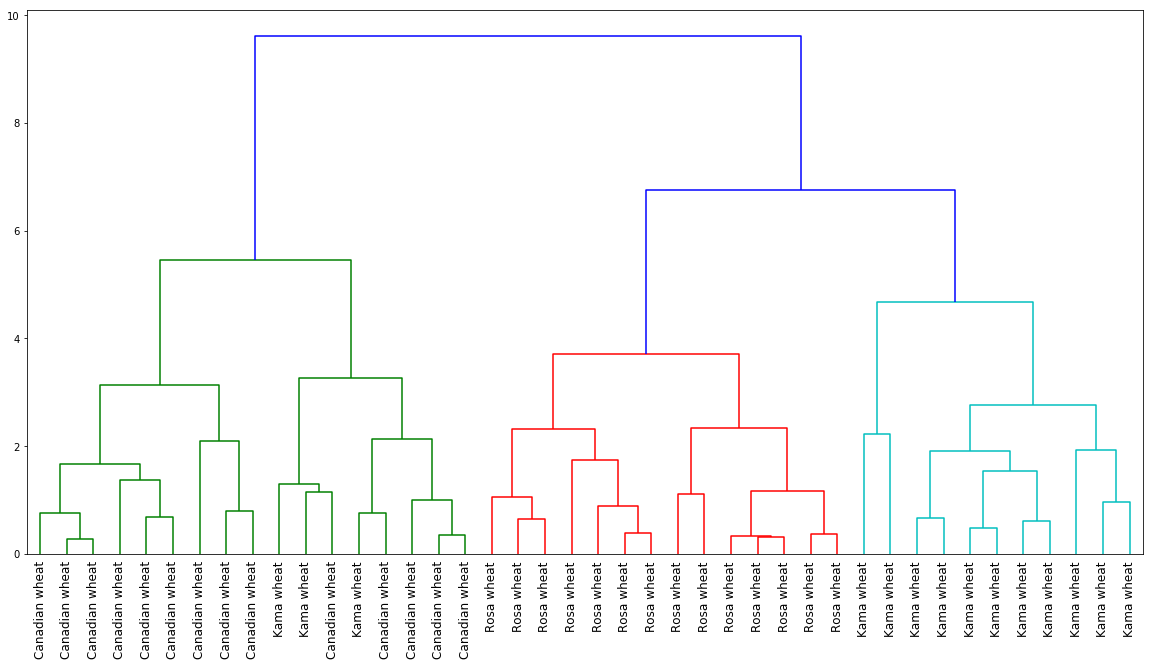

In [3]:
plt.figure(figsize=(20,10))

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=12,
)
plt.show()

## Discuss: Displayed on the right is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier. If the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?

## Discuss: If there are 5 data samples, how many merge operations will occur in a hierarchical clustering (to get one cluster)? 
1) 4

2) 5

3) many possible answers

## Hierarchical clustering is more than a visualization tool

Cluster labels at any intermediate stage can be recovered
- can be done by choosing a hight on the dengrogram
- remember the y axis on the dendrogram are distances between merging clusters
    - hight parameter controls the max. distance between merging cluster
    - clusters further apart than the *hight* won't be merged



Use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.
- Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of *6* and the keyword argument criterion='distance'.
- Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
- Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

In [4]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster
# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


## Exercise
You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

- If you have to guess, which country has the closest taste of performances of Poland?

In [5]:
samples = [[  2.,  12.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,  10.,   0.,   4.,   0.,   5.,   7.,   0.,   0.,
          3.,   0.,   6.,   0.],
       [ 12.,   0.,   4.,   0.,   0.,   0.,   0.,   6.,   0.,   7.,   8.,
          0.,   3.,   0.,   0.,   0.,   0.,   5.,   1.,  12.,   0.,   0.,
          2.,   0.,  10.,   0.],
       [  0.,  12.,   3.,   0.,  12.,  10.,   0.,   0.,   0.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   6.,   0.,   5.,   0.,   2.,
          0.,   0.,   8.,   4.],
       [  0.,   3.,  12.,   0.,   0.,   5.,   0.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   8.,   4.,   0.,
          7.,   6.,  10.,   0.],
       [  0.,   2.,   0.,  12.,   0.,   8.,   0.,   0.,   0.,   4.,   1.,
          0.,   7.,   6.,   0.,   0.,   0.,   5.,   3.,  12.,   0.,   0.,
          0.,   0.,  10.,   0.],
       [  7.,   1.,   0.,   8.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,   0.,   5.,   0.,   0.,   6.,  12.,   0.,   0.,
          2.,   0.,  10.,   0.],
       [  7.,   4.,   3.,   0.,  12.,   5.,   0.,   0.,   0.,   8.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   6.,   0.,   0.,
          1.,  10.,   2.,   0.],
       [  0.,   3.,   5.,   8.,   0.,   2.,  10.,   0.,   0.,   4.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,  12.,   0.,
          0.,   0.,   7.,   0.],
       [  8.,   5.,   4.,   1.,   0.,  12.,   0.,   7.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   6.,  12.,   0.,   0.,
          3.,   0.,  10.,   0.],
       [  0.,   5.,   6.,   0.,   0.,   1.,  12.,   0.,   0.,   2.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   4.,   8.,  12.,   0.,
          7.,   0.,  10.,   0.],
       [  8.,   5.,   0.,   0.,   0.,  12.,   0.,  12.,   0.,   6.,   0.,
          0.,   4.,   0.,   0.,   0.,   3.,   0.,   2.,  10.,   0.,   0.,
          1.,   0.,   7.,   0.],
       [  8.,   1.,   4.,   6.,   0.,   5.,   0.,   0.,  12.,   0.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   7.,  10.,   0.,   0.,
          2.,   0.,  12.,   0.],
       [  0.,  10.,   1.,   0.,   8.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   6.,   0.,   5.,   4.,   0.,   0.,
         12.,   7.,   3.,   0.],
       [  0.,   4.,   6.,   0.,   0.,   0.,   0.,   3.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   7.,   5.,   0.,   1.,  12.,   0.,   0.,
         10.,   0.,   8.,   0.],
       [  7.,   3.,   0.,   0.,   4.,  10.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   8.,  12.,   0.,
          0.,   0.,   6.,   0.],
       [  0.,   7.,   6.,   0.,   0.,   4.,   0.,   1.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   5.,   8.,   0.,   0.,
         10.,   0.,  12.,   0.],
       [ 12.,   0.,   8.,   0.,   4.,   5.,   0.,   0.,   0.,  12.,   0.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   7.,   6.,   0.,   1.,
          2.,   0.,  10.,   0.],
       [ 12.,   1.,   0.,   7.,   0.,   3.,   0.,   0.,   0.,   0.,  12.,
          0.,   2.,   0.,   0.,   6.,   5.,   0.,   4.,   8.,   0.,   0.,
          0.,   0.,  10.,   0.],
       [  2.,   5.,   7.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,
         12.,   0.,   0.,   1.,   0.,   0.,   0.,  10.,  12.,   0.,   0.,
          8.,   3.,   6.,   0.],
       [  8.,   5.,   1.,   0.,   0.,   7.,   0.,  12.,   0.,   4.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   3.,  10.,   0.,   0.,
          0.,   0.,   6.,   0.],
       [  0.,   3.,   6.,   0.,   0.,   4.,   0.,   5.,   0.,   1.,   0.,
          0.,  12.,   0.,   0.,   0.,   0.,   0.,   8.,  10.,   0.,   0.,
          7.,   2.,  12.,   0.],
           [  0.,   8.,   2.,   1.,   3.,   0.,   0.,   0.,   0.,   5.,   0.,
          0.,   0.,   0.,   0.,   0.,   4.,   0.,  10.,   7.,   0.,   0.,
         12.,   6.,   0.,   0.],
       [  0.,   6.,   1.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   7.,  12.,   0.,  10.,   8.,   0.,   0.,
          2.,   0.,   4.,   3.],
       [  6.,   5.,   3.,   2.,   1.,   7.,   0.,   0.,   0.,  12.,   0.,
          0.,   0.,  12.,   0.,   0.,   0.,   0.,   4.,  10.,   0.,   0.,
          0.,   0.,   8.,   0.],
       [  1.,   0.,   0.,   0.,   0.,   7.,   0.,   6.,   0.,   5.,   3.,
          0.,   0.,   0.,  12.,   0.,   2.,   0.,  10.,   8.,   4.,   0.,
          0.,   0.,  12.,   0.],
       [  0.,   6.,   4.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,  12.,   8.,   0.,   5.,  12.,   0.,   0.,
          7.,   0.,  10.,   0.],
       [  0.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   4.,
          0.,   2.,   0.,   0.,  12.,  12.,   0.,   6.,   8.,   0.,   0.,
          7.,   0.,  10.,   0.],
       [  0.,  12.,   0.,   6.,   0.,   8.,   0.,   0.,   0.,   2.,   0.,
          0.,   5.,   0.,   7.,   0.,   0.,  12.,   0.,  10.,   0.,   0.,
          0.,   3.,   4.,   1.],
       [  7.,   5.,   4.,   8.,   0.,   2.,   0.,   0.,   0.,   6.,   0.,
          0.,   0.,   0.,   0.,   1.,   3.,   0.,   0.,  12.,   0.,   0.,
          0.,   0.,  10.,   0.],
       [  0.,   0.,   0.,   7.,   0.,   5.,   6.,   0.,   0.,   1.,   0.,
          0.,   3.,   0.,   4.,   0.,   2.,   0.,   0.,  10.,  12.,   0.,
          0.,   0.,   8.,   0.],
       [  0.,   8.,   0.,   0.,   2.,   5.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   3.,  12.,   0.,  10.,   6.,   0.,   0.,
          7.,   0.,   4.,   0.],
       [  2.,   7.,   4.,   0.,   0.,   3.,   0.,   1.,   0.,   0.,   0.,
          0.,   6.,   0.,   0.,   5.,   0.,   0.,  12.,   8.,   0.,   0.,
         10.,   0.,  12.,   0.],
       [ 12.,   4.,   8.,   6.,   0.,   0.,   0.,   7.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   5.,  12.,   0.,   0.,
          2.,   0.,  10.,   0.],
       [  2.,   5.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   6.,   8.,   0.,   7.,  10.,   0.,   0.,
          4.,   0.,  12.,   0.],
       [  2.,   6.,   0.,   0.,   5.,   8.,   4.,   3.,   0.,   0.,   0.,
          0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,  12.,   0.,
          1.,   0.,   7.,   0.],
       [  0.,   3.,   6.,   0.,   0.,   2.,   8.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   4.,  10.,  12.,   0.,
          5.,   0.,   7.,   0.],
       [  6.,   4.,   2.,   0.,   0.,  12.,   0.,   0.,   0.,  10.,   0.,
          0.,   0.,   0.,   3.,   0.,   0.,   0.,   5.,   8.,   0.,  12.,
          1.,   0.,   7.,   0.],
       [  0.,  12.,   5.,   0.,   0.,   4.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   6.,   0.,  10.,   8.,   0.,   1.,
         12.,   2.,   7.,   0.],
       [  0.,   1.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
          8.,   0.,   0.,   7.,   0.,   0.,   0.,   5.,   6.,  12.,   2.,
          0.,   0.,   4.,   0.],
       [  8.,   5.,   6.,   0.,  12.,   1.,   0.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   3.,   0.,   0.,
          2.,  12.,   7.,   0.],
       [  7.,   4.,   0.,  10.,   0.,   2.,   0.,   0.,   0.,   0.,   6.,
          0.,   0.,   0.,   0.,   5.,   3.,   0.,   8.,  12.,   0.,   0.,
          1.,   0.,  12.,   0.],
       [  0.,   6.,   0.,   0.,   0.,   8.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,  12.,   0.,  10.,   7.,   0.,   4.,
          1.,   0.,   5.,  12.]]
           
country_names = ['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Montenegro',
 'Norway',
 'Poland',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Ukraine',
 'United Kingdom']



In [6]:
len(country_names)

42

In [7]:
len(samples)

42

In [8]:
# build a dataframe from samples: samples
# it is okay that we do not have column names


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,12.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,12.0,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,12.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,12.0,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


- Import:
    - linkage and dendrogram from scipy.cluster.hierarchy.
    - matplotlib.pyplot as plt.
- Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
- Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.

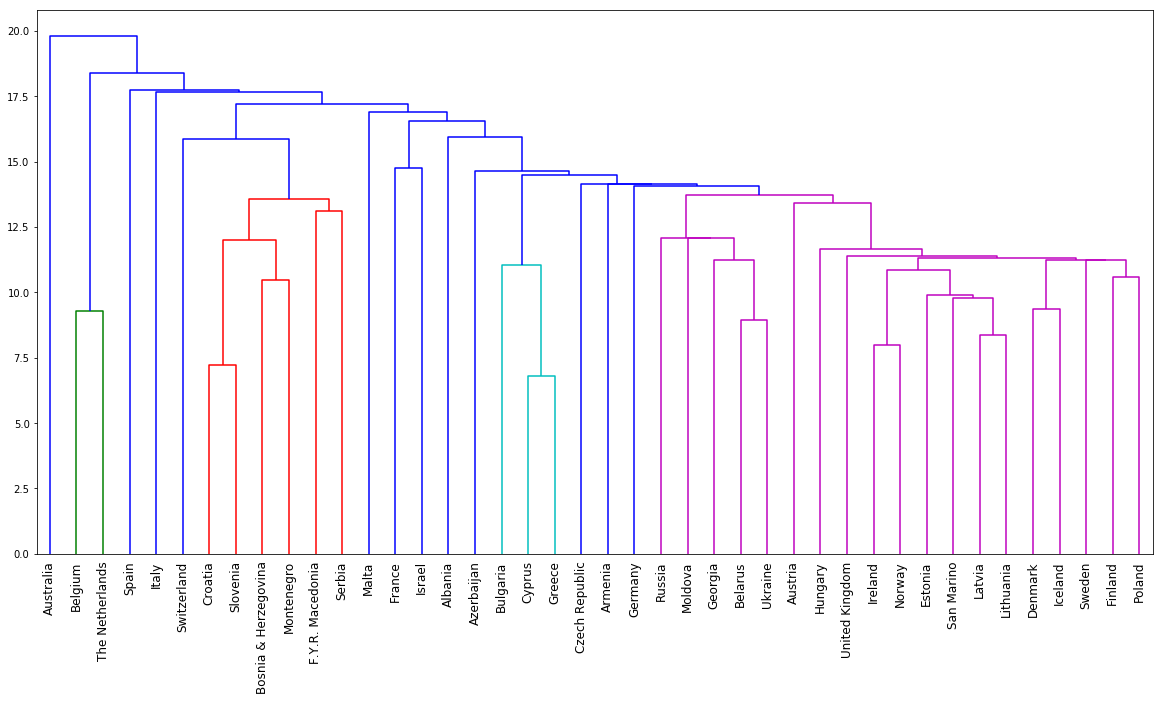

In [9]:
plt.figure(figsize=(20,10))

# Perform the necessary imports

# Calculate the linkage: mergings

# Plot the dendrogram



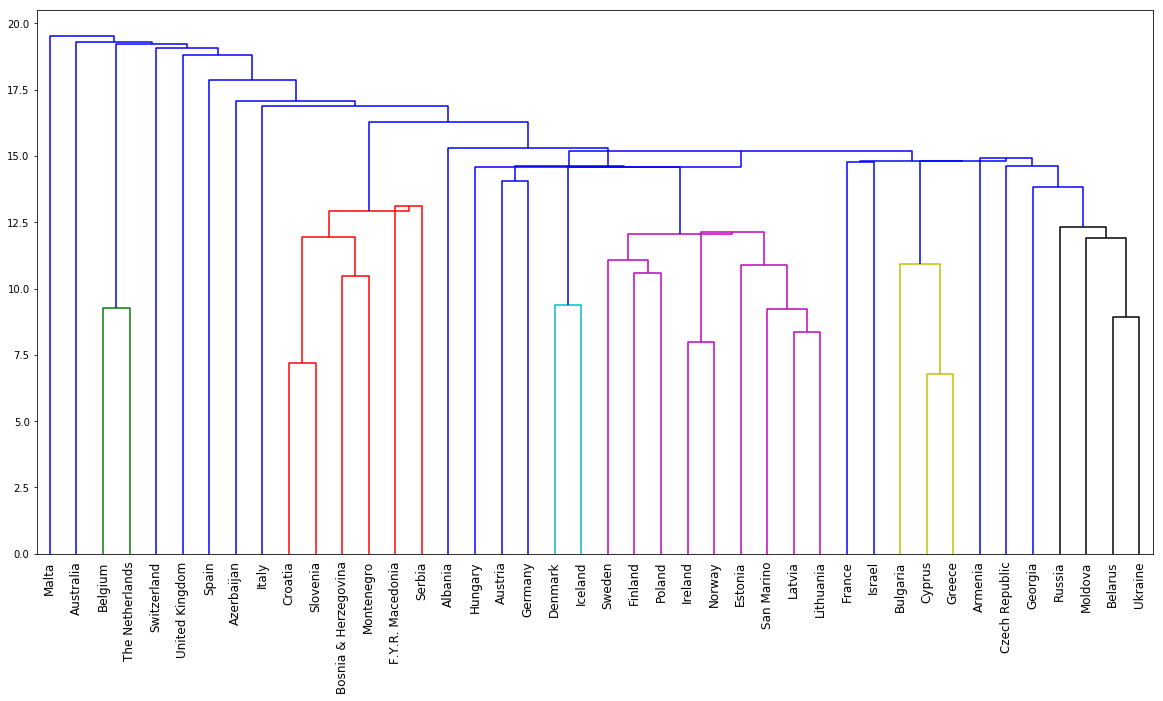

In [10]:
# try another linkage with method 'centroid'


# Calculate the linkage: mergings


# Plot the dendrogram




## Discuss: what is your observation about Belgium and Netherlands?

## To sum up

- Hierarchical clustering is one of the slowest clustering algorithm
    - definitely not for large dataset

- Make use of dendrogram to visualize your clustering on small datasets

[We will have another lecture tomorrow, the presentation of course project will be on next Monday,Tuesday and Wednesday]